## Final Project Submission

Please fill out:
* Student name: Kevin Evans & Jonathan Vasquez
* Student pace: Full Time
* Scheduled project review date/time: 07/10/2020
* Instructor name: Sean Wilson
* Blog post URL:


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 
import matplotlib.pyplot as plt
import itertools
import warnings

from pandas import set_option
plt.style.use('ggplot')
pd.set_option('display.max_columns', 1000)
%matplotlib inline 
import warnings; warnings.simplefilter('ignore')

from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks
from IPython.display import Image  
import pydotplus

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO  

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 

from scipy.stats import randint

from sklearn.linear_model import LogisticRegression 

from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectFromModel

from sklearn.utils import resample

/Users/kevinevans/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Data info is here:
https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

#### Drug Usuage Identifier
* CL0 Never Used
* CL1 Used over a Decade Ago  
* CL2 Used in Last Decade 
* CL3 Used in Last Year  
* CL4 Used in Last Month  
* CL5 Used in Last Week 
* CL6 Used in Last Day

#### Drug Definition

* Amyl Nitrite (AKA Poppers, similar to acid (LSD) and ecstasy)
* Legal High (AKA Bath Salts,avaliable to buy OTC)
* VSA (Volatile Substance Abuse, glue/marker sniffers)

# Importing/Inspecting Data

In [2]:
df = pd.read_csv('drug_consumption.csv', index_col=0) #ID as index
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0


In [3]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

# Data Cleaning/Feature Engineering

In [4]:
df.isnull().any() #No Missing Values

Age          False
Gender       False
Education    False
Country      False
Ethnicity    False
Nscore       False
Escore       False
Oscore       False
Ascore       False
Cscore       False
Impulsive    False
SS           False
Alcohol      False
Amphet       False
Amyl         False
Benzos       False
Caff         False
Cannabis     False
Choc         False
Coke         False
Crack        False
Ecstasy      False
Heroin       False
Ketamine     False
Legalh       False
LSD          False
Meth         False
Mushrooms    False
Nicotine     False
Semer        False
VSA          False
dtype: bool

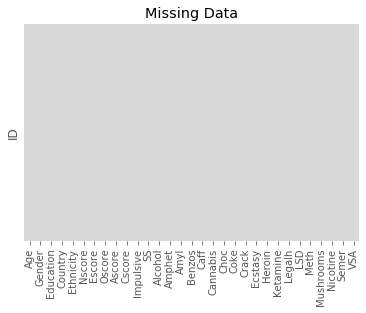

In [5]:
#Visual Showing No Missing Values
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 1 to 1888
Data columns (total 31 columns):
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null object
LSD          1885 non-null obje

Updating categorical data for drug use to be binary: 
* 0 = Non-User, 1 = User

In [7]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [8]:
df['Crack_User'] = np.where(df['Crack'].isin(['CL2','CL3','CL4','CL5','CL6']), 1, 0) #Make Crack_User column

In [9]:
df = df.drop(['Crack'], axis=1) #Dropped Crack column

In [10]:
df['Age'] = df['Age'].astype(str)

In [11]:
conditions = [(df['Age'] == '-0.9519700000000001'), (df['Age'] == '-0.07854'),
             (df['Age'] == '0.49788000000000004'), (df['Age'] == '1.09449'),
             (df['Age'] == '1.82213'), (df['Age'] == '2.59171')]
choices = ['18-24', '25-35', '35-44', '45-54', '55-64', '65+']

In [12]:
df['Age'] = np.select(conditions, choices, df['Age'])

In [13]:
df['Age'].value_counts()

18-24    643
25-35    481
35-44    356
45-54    294
55-64     93
65+       18
Name: Age, dtype: int64

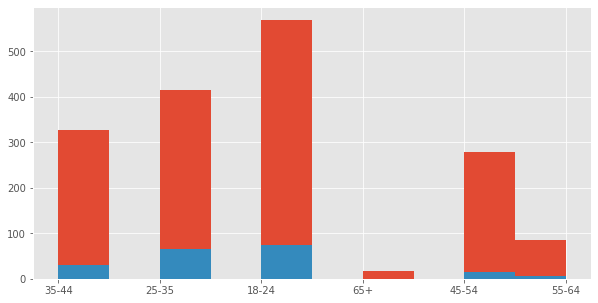

In [14]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df.groupby('Crack_User')['Age'].hist(ax=ax);

In [15]:
#df.groupby('Age')

In [16]:
df['Gender'] = df['Gender'].astype(str)

In [17]:
conditions = [(df['Gender'] == '0.48246000000000006'), (df['Gender'] == '-0.48246000000000006'),
             ]
choices = ['Female', 'Male']

In [18]:
df['Gender'] = np.select(conditions, choices, df['Gender'])

In [19]:
df['Gender'].value_counts()

Male      943
Female    942
Name: Gender, dtype: int64

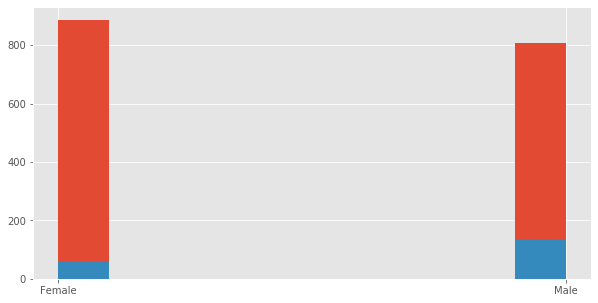

In [20]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df.groupby('Crack_User')['Gender'].hist(ax=ax);

In [21]:
df['Education'] = df['Education'].astype(str)

In [22]:
conditions = [(df['Education'] == '-0.6111300000000001'), (df['Education'] == '0.45468000000000003'),
             (df['Education'] == '1.16365'), (df['Education'] == '-0.059210000000000006'),
             (df['Education'] == '-1.22751'), (df['Education'] == '-1.7379'),
             (df['Education'] == '1.98437'), (df['Education'] == '-1.43719'), 
              (df['Education'] == '-2.43591')]
choices = ['Some college or university, no certificate or degree', 'University degree', 
           'Masters Degree', 'Professional certificate or diploma', 'Left school at 18 years', 
           'Left school at 16 years', 'Doctorate degree', 'Left school at 17 years',
           'Left school before 16 years']

In [23]:
df['Education'] = np.select(conditions, choices, df['Education'])

In [24]:
df['Education'].value_counts()

Some college or university, no certificate or degree    506
University degree                                       480
Masters Degree                                          283
Professional certificate or diploma                     270
Left school at 18 years                                 100
Left school at 16 years                                  99
Doctorate degree                                         89
Left school at 17 years                                  30
Left school before 16 years                              28
Name: Education, dtype: int64

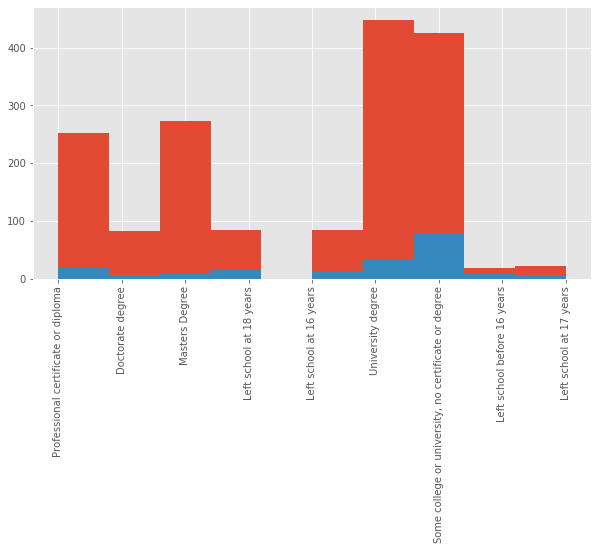

In [25]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df.groupby('Crack_User')['Education'].hist(ax=ax, xrot=90);

In [26]:
df['Country'] = df['Country'].astype(str)

In [27]:
conditions = [(df['Country'] == '0.9608200000000001'), (df['Country'] == '-0.57009'),
             (df['Country'] == '-0.28519'), (df['Country'] == '0.24923'),
             (df['Country'] == '-0.09765'), (df['Country'] == '0.21128000000000002'),
             (df['Country'] == '-0.46841000000000005')]
choices = ['UK', 'USA', 'Other', 'Canada', 'Australia', 'Republic of Ireland', 'New Zealand']

In [28]:
df['Country'] = np.select(conditions, choices, df['Country'])

In [29]:
df['Country'].value_counts()

UK                     1044
USA                     557
Other                   118
Canada                   87
Australia                54
Republic of Ireland      20
New Zealand               5
Name: Country, dtype: int64

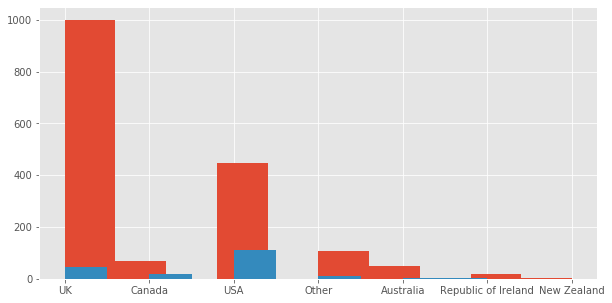

In [30]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df.groupby('Crack_User')['Country'].hist(ax=ax);

In [31]:
df['Ethnicity'] = df['Ethnicity'].astype(str)

In [32]:
conditions = [(df['Ethnicity'] == '-0.31685'), (df['Ethnicity'] == '0.1144'),
             (df['Ethnicity'] == '-1.1070200000000001'), (df['Ethnicity'] == '-0.50212'),
             (df['Ethnicity'] == '-0.22166'), (df['Ethnicity'] == '0.126'),
             (df['Ethnicity'] == '1.90725')]
choices = ['White', 'Other', 'Black', 'Asian', 'Mixed-White/Black', 'Mixed-White/Asian', 
           'Mixed-Black/Asian']

In [33]:
df['Ethnicity'] = np.select(conditions, choices, df['Ethnicity'])

In [34]:
df['Ethnicity'].value_counts()

White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Black      20
Mixed-White/Asian      20
Mixed-Black/Asian       3
Name: Ethnicity, dtype: int64

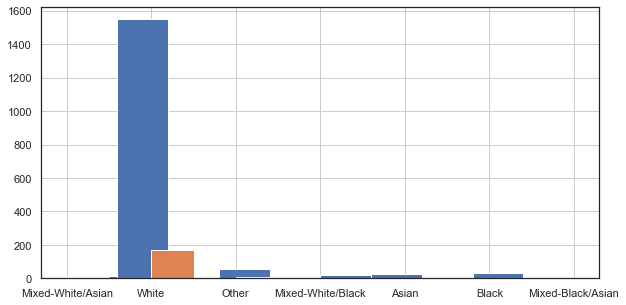

In [58]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df.groupby('Crack_User')['Ethnicity'].hist(ax=ax);

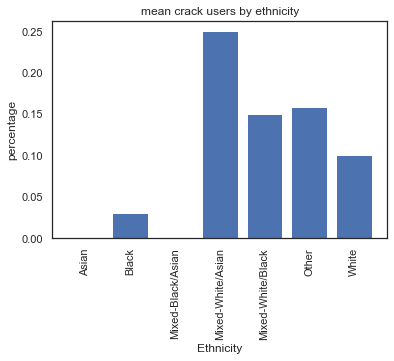

In [66]:
fig, ax = plt.subplots()
ax.bar(df.groupby('Ethnicity')['Crack_User'].mean().index, df.groupby('Ethnicity')['Crack_User'].mean().values)
ax.set_ylabel('percentage')
ax.set_xlabel('Ethnicity')
ax.set_title('mean crack users by ethnicity')
plt.xticks(rotation=90)
plt.show()

In [36]:
dummies = ['Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA', 'Education', 'Age', 'Gender', 'Country', 'Ethnicity']

In [37]:
# df = pd.get_dummies(data=df, columns=dummies, drop_first=True) 

In [38]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Crack_User
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,35-44,Female,Professional certificate or diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,0
2,25-35,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0,0
3,35-44,Male,Professional certificate or diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,0
4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0,0
5,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,Female,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5,0
1885,18-24,Male,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0,0
1886,25-35,Female,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0,0


# EDA

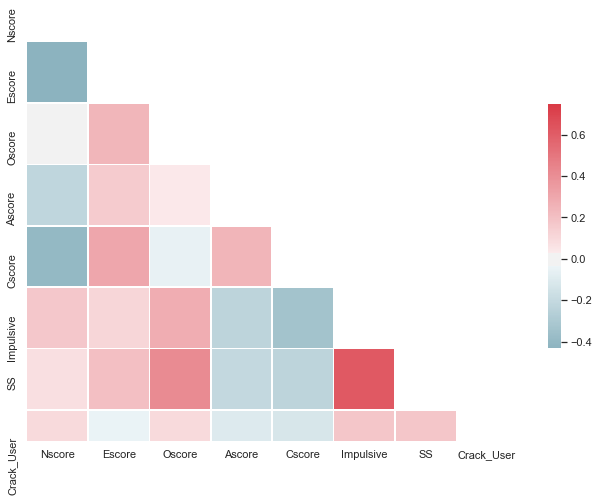

In [39]:
#Heatmap to Visualize Correlations
sns.set(style="white")
corr = df.corr() 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [40]:
features = df.drop(columns='Crack_User').columns

In [41]:
features

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [42]:
#Distribute columns into groups of 4 per row
n = 4
row_groups = [features[i:i+n] for i in range(0, len(features), n)]

AttributeError: 'str' object has no attribute 'conjugate'

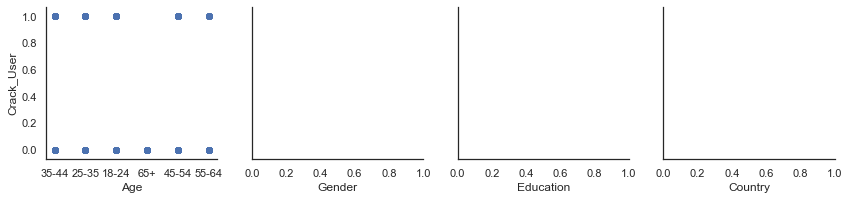

In [43]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['Crack_User'],x_vars=i, kind="reg", height=3)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax);

In [ ]:
target = df['Crack_User']
features = df.drop(columns='Crack_User')

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=42)

In [ ]:
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = features.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

### Logistic Regression

In [ ]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)
logreg_f1 = metrics.f1_score(y_test, logreg_preds)
logreg_acc = metrics.accuracy_score(y_test, logreg_preds)
print('Test F1:' , logreg_f1)
print('Test Accuracy:' , logreg_acc)

### KNN

In [ ]:
knn = KNeighborsClassifier(weights='distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_f1 = metrics.f1_score(y_test, y_pred_knn)
knn_acc = metrics.accuracy_score(y_test, y_pred_knn)
print('Test F1:' + str(knn_f1))
print('Test Accuracy:' + str(knn_acc))

### Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=10, class_weight='balanced')
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_f1 = metrics.f1_score(tree_pred, y_test)
tree_acc = metrics.accuracy_score(tree_pred, y_test)
print('Test F1 score: ', tree_f1)
print('Test Accuracy score: ', tree_acc)

### Random Forest

In [ ]:
forest = RandomForestClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1, n_estimators = 100)
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_test)
forest_f1 = metrics.f1_score(y_test, forest_preds)
forest_acc = metrics.accuracy_score(y_test, forest_preds)
print('Test F1 score: ', forest_f1)
print('Test Accuracy score: ', forest_acc)

### GridCV - RF

In [ ]:
forest_params = { 
    'n_estimators': [350, 400, 450],
    'max_features': [.15, .25, .35],
    'max_depth' : [3, 5, 7],
    'criterion' : ['entropy']   
}

In [ ]:
blank_forest = RandomForestClassifier(random_state = 1, class_weight='balanced')
forest_grid = GridSearchCV(estimator=blank_forest, param_grid=forest_params, cv= 5, scoring='f1', verbose=1, n_jobs=-1)
forest_grid.fit(X_train, y_train)
print(forest_grid.best_params_)
print(forest_grid.best_estimator_)
print(forest_grid.best_score_)

In [ ]:
best_forest = forest_grid.best_estimator_
bf_preds = best_forest.predict(X_test)
bf_f1 = metrics.f1_score(y_test, bf_preds)
bf_acc = metrics.accuracy_score(y_test, bf_preds)
print('Test F1 score: ', bf_f1)
print('Test Accuracy score: ', bf_acc)